In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [91]:
data_df = pd.read_csv('fish_data.csv')
data_df

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [92]:
# Lets get 3 of the species to make the data simpler.
selected_species = 'Sillaginopsis panijus' , 'Pethia conchonius', 'Puntius lateristriga'
# Filter the DataFrame to include only those species
data_df_species = data_df[data_df['species'].isin(selected_species)]

Now we can calculate some of the statistics for the chosen dataframe.

In [93]:
data_df_species.describe()

,length,weight,w_l_ratio
count,1348.000000,1348.000000,1348.000000
mean,17.924184,4.505734,0.301113
std,9.578604,1.413635,0.141610
min,7.100000,2.490000,0.170000
25%,10.310000,2.670000,0.190000
50%,13.170000,4.590000,0.210000
75%,30.070000,6.110000,0.440000
max,33.860000,6.290000,0.640000


We can further calculate some statistics based on the species. That would give us a clearer picture.

In [94]:
# We should group data by species
grouped_data = data_df_species.groupby('species')

# Now, print the statistics of this data
for species, group_df in grouped_data:
    print(f"Basic statistics for {species}:")
    print(group_df.describe())
    print("\n")

Basic statistics for Pethia conchonius:
           length      weight   w_l_ratio
count  475.000000  475.000000  475.000000
mean     9.604800    4.585453    0.485747
std      1.284322    0.032243    0.061931
min      7.100000    4.480000    0.360000
25%      8.590000    4.560000    0.440000
50%      9.480000    4.590000    0.480000
75%     10.520000    4.610000    0.530000
max     12.840000    4.680000    0.640000


Basic statistics for Puntius lateristriga:
           length      weight   w_l_ratio
count  418.000000  418.000000  418.000000
mean    13.071938    2.632799    0.203254
std      1.252124    0.045027    0.019402
min      9.690000    2.490000    0.170000
25%     12.092500    2.600000    0.190000
50%     13.245000    2.630000    0.200000
75%     14.075000    2.660000    0.217500
max     15.410000    2.760000    0.270000


Basic statistics for Sillaginopsis panijus:
           length      weight   w_l_ratio
count  455.000000  455.000000  455.000000
mean    31.066923    6.143143

Now, we can drop the non-numeric columns and make a new dataframe.

In [95]:
data_df_without_species = data_df_species.drop(columns=['species'])

In [96]:
data_df_without_species.skew()

,0
length,0.605359
weight,-0.196629
w_l_ratio,0.803902


In [97]:
data_df_without_species.kurt()

,0
length,-1.468904
weight,-1.428425
w_l_ratio,-1.062747


We can also calculate the correlation between the variables.

In [98]:
data_df_without_species.corr().style.background_gradient(cmap='coolwarm')

,length,weight,w_l_ratio
length,1.000000,0.730585,-0.655515
weight,0.730585,1.000000,0.022873
w_l_ratio,-0.655515,0.022873,1.000000


We can also calculate the correlation between the variab

In [99]:
grouped_corr = data_df_species.groupby('species').corr()
grouped_corr

length    weight  w_l_ratio
species                                                       
Pethia conchonius     length     1.000000  0.645695  -0.987679
                      weight     0.645695  1.000000  -0.615617
                      w_l_ratio -0.987679 -0.615617   1.000000
Puntius lateristriga  length     1.000000  0.422183  -0.966925
                      weight     0.422183  1.000000  -0.258051
                      w_l_ratio -0.966925 -0.258051   1.000000
Sillaginopsis panijus length     1.000000  0.847795  -0.920114
                      weight     0.847795  1.000000  -0.720145
                      w_l_ratio -0.920114 -0.720145   1.000000

In [100]:
for species, group_df in grouped_data:
    print(f"Basic statistics for {species}:")
    print(group_df.describe())
    print("\n")

Basic statistics for Pethia conchonius:
           length      weight   w_l_ratio
count  475.000000  475.000000  475.000000
mean     9.604800    4.585453    0.485747
std      1.284322    0.032243    0.061931
min      7.100000    4.480000    0.360000
25%      8.590000    4.560000    0.440000
50%      9.480000    4.590000    0.480000
75%     10.520000    4.610000    0.530000
max     12.840000    4.680000    0.640000


Basic statistics for Puntius lateristriga:
           length      weight   w_l_ratio
count  418.000000  418.000000  418.000000
mean    13.071938    2.632799    0.203254
std      1.252124    0.045027    0.019402
min      9.690000    2.490000    0.170000
25%     12.092500    2.600000    0.190000
50%     13.245000    2.630000    0.200000
75%     14.075000    2.660000    0.217500
max     15.410000    2.760000    0.270000


Basic statistics for Sillaginopsis panijus:
           length      weight   w_l_ratio
count  455.000000  455.000000  455.000000
mean    31.066923    6.143143

We can plot the pie chart to get an idea of the distribution of the species that we have selected.

In [101]:
species_counts = data_df_species['species'].value_counts()

In [127]:
def plot_fish_pie(species_counts, labels= species_counts.index):
    """
    Plots a pie chart of the species counts
    """
    plt.figure(dpi=100)
    plt.pie(species_counts, labels=labels, autopct='%1.1f%%')
    plt.title('Pie chart for distribution of the species')
    plt.axis('Equal')
    plt.show()
    return

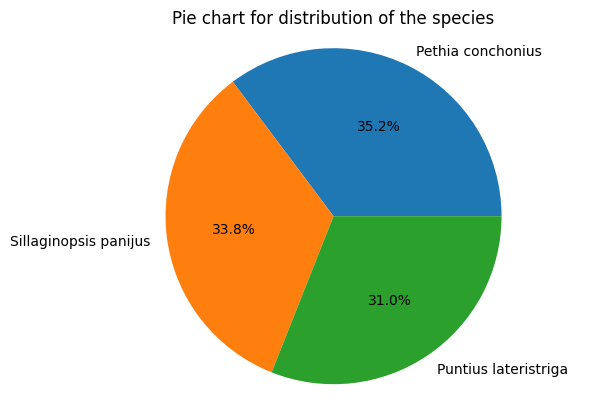

In [128]:
plot_fish_pie(species_counts)

Now, we have to drop the non-numeric columns.

In [104]:
data_df_without_species = data_df_species.drop(columns=['species'])

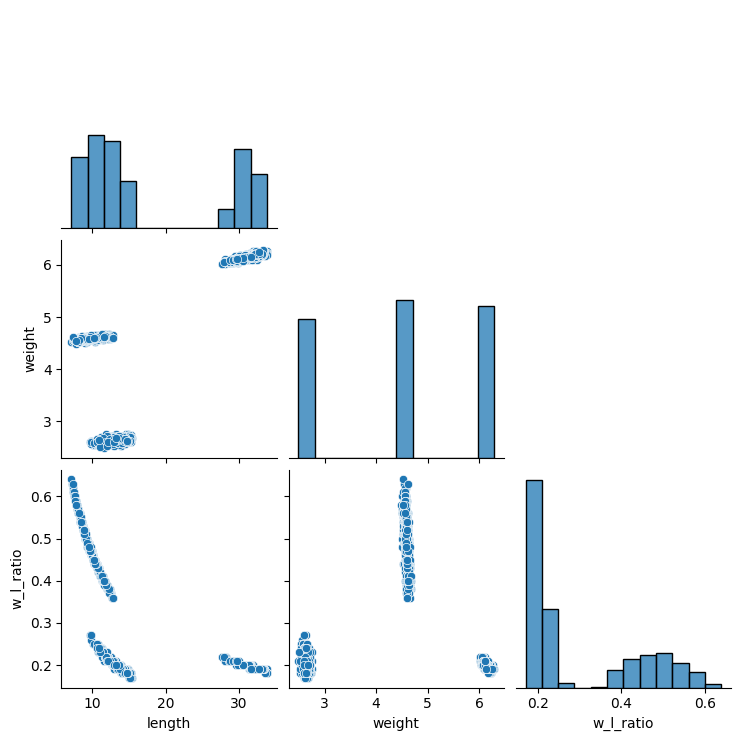

In [105]:
sns.pairplot(data_df_without_species, corner=True)
plt.show()

In [106]:
def plot_correlation_heatmap(data_df_without_species):
  """
  Plots a heatmap of the correlation between the variables
  """
  fig, ax = plt.subplots(dpi=100)
  mask = np.triu(np.ones_like(data_df_without_species.corr()))
  sns.heatmap(data_df_without_species.corr(), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
  plt.show()
  return

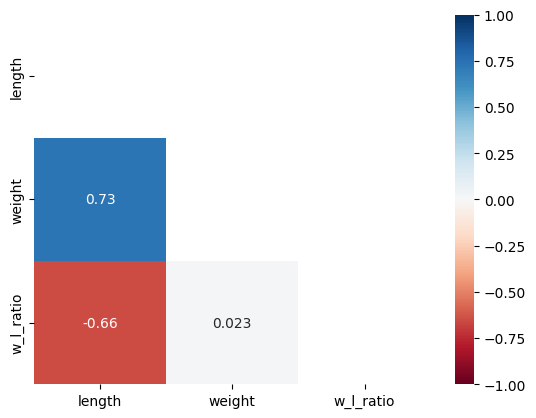

In [107]:
plot_correlation_heatmap(data_df_without_species)

In [167]:
# Lets draw the scatter plot of the data we want to cluster
def plot_scatter(data_df_without_species):
    """
    Plots a scatter plot of the given data
    """
    plt.figure(dpi=100)
    plt.scatter(data_df_without_species['length'], data_df_without_species['weight'], s=1, c = 'red')
    plt.xlabel('Length')
    plt.ylabel('Weight')
    plt.grid(True)
    plt.title('Scatter plot for Length and Weight')
    plt.show()

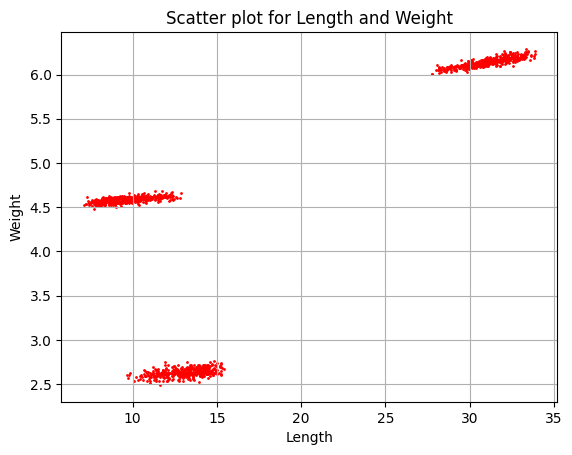

In [168]:
plot_scatter(data_df_without_species)

There happen to be some formation of the clusters in the given data between some of the variables.

In [108]:
from sklearn.preprocessing import RobustScaler
df_cut = data_df_without_species[['length', 'weight']].copy()
scaler = RobustScaler()
norm = scaler.fit_transform(df_cut)
inv_norm = scaler.inverse_transform(norm)

In [109]:
def one_silhoutte_inertia(n, xy):
    """
    Calculates the silhoutte score and WCSS for n clusters
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_

    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia

In [110]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red', facecolors='none', s=50)
    ax.set_xlabel('k')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    plt.show()
    return

 2 clusters silhoutte score = 0.80
 3 clusters silhoutte score = 0.89
 4 clusters silhoutte score = 0.77
 5 clusters silhoutte score = 0.67
 6 clusters silhoutte score = 0.57
 7 clusters silhoutte score = 0.56
 8 clusters silhoutte score = 0.53
 9 clusters silhoutte score = 0.52
10 clusters silhoutte score = 0.52
Best number of clusters =  3


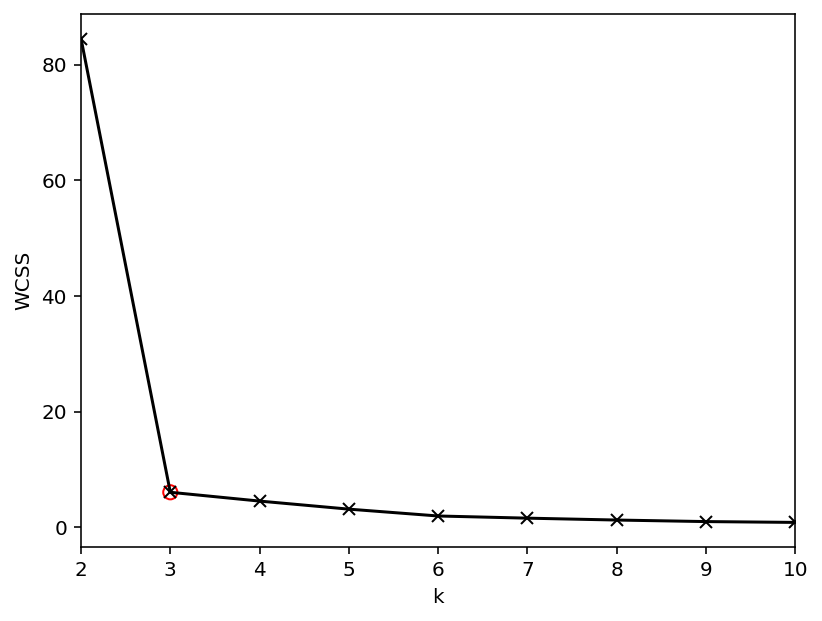

In [111]:
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")
plot_elbow_method(2, 10, wcss, best_n)

In [169]:
from matplotlib.colors import ListedColormap
colours = plt.cm.Set1(np.linspace(0, 1, 10))
cmap = ListedColormap(colours)

In [178]:
def plot_fitted_length_width(labels, xy, xkmeans, ykmeans, centre_labels):
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)

    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(xy[:, 0], xy[:, 1], c=labels, cmap=cmap, marker='o', s = 1, label='Data')

    ax.scatter(xkmeans, ykmeans, c='black', cmap=cmap, marker='x', s=25, label='Estimated Centres')

    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    ax.legend()
    ax.set_xlabel('length')
    ax.set_ylabel('Width')
    plt.show()
    return

<ipython-input-178-966244c601f6>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xkmeans, ykmeans, c='black', cmap=cmap, marker='x', s=25, label='Estimated Centres')


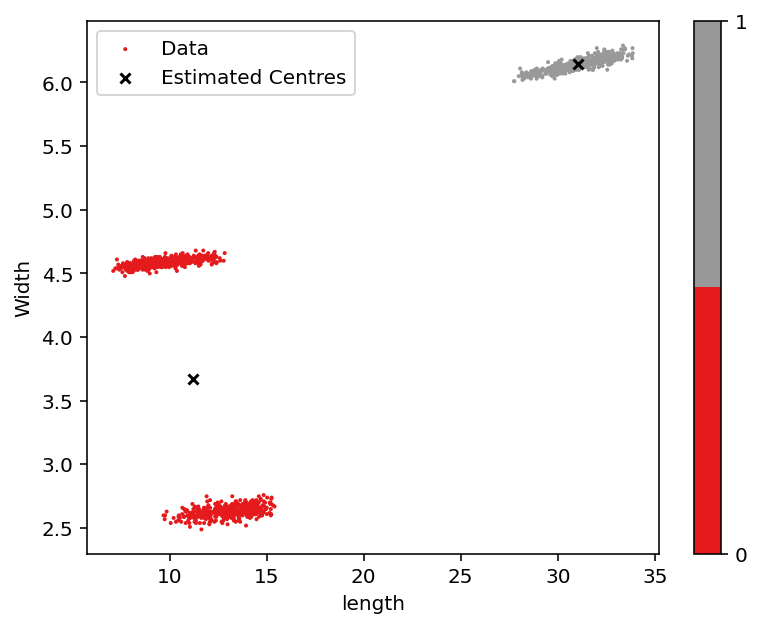

<ipython-input-178-966244c601f6>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xkmeans, ykmeans, c='black', cmap=cmap, marker='x', s=25, label='Estimated Centres')


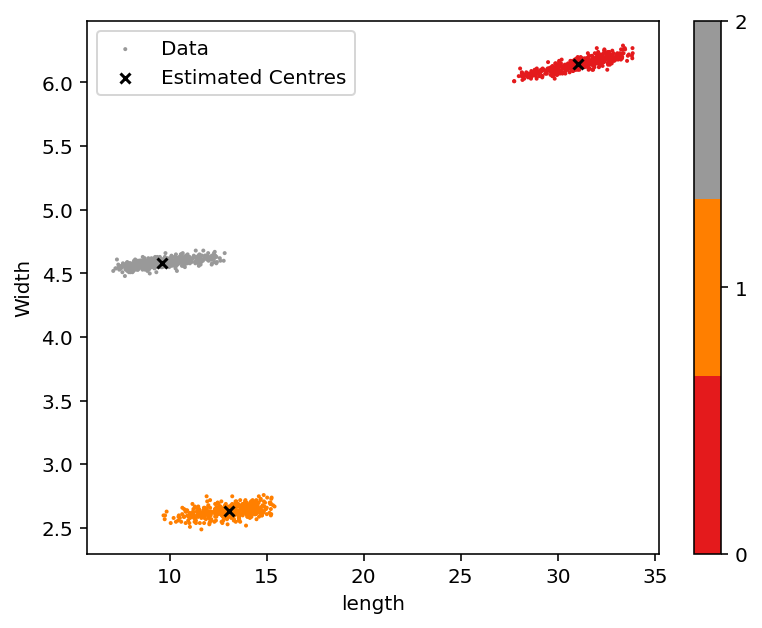

<ipython-input-178-966244c601f6>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xkmeans, ykmeans, c='black', cmap=cmap, marker='x', s=25, label='Estimated Centres')


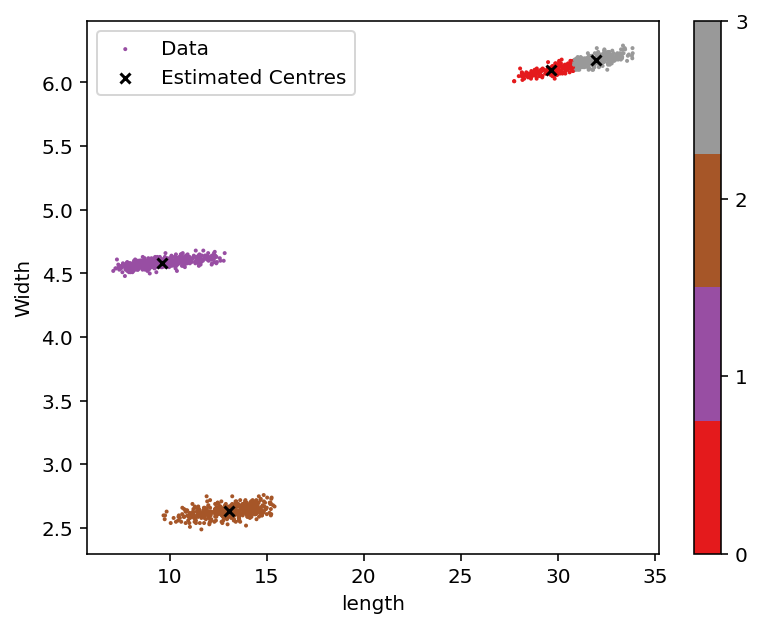

<ipython-input-178-966244c601f6>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xkmeans, ykmeans, c='black', cmap=cmap, marker='x', s=25, label='Estimated Centres')


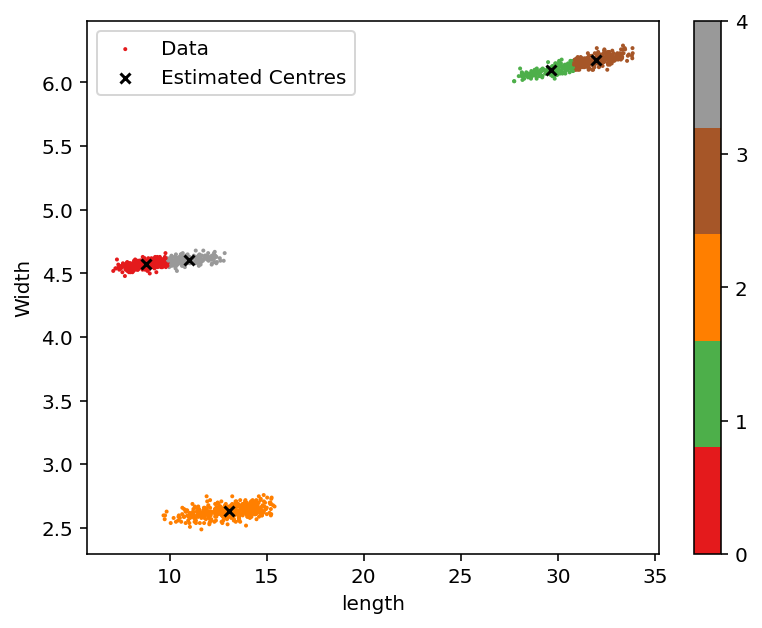

<ipython-input-178-966244c601f6>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xkmeans, ykmeans, c='black', cmap=cmap, marker='x', s=25, label='Estimated Centres')


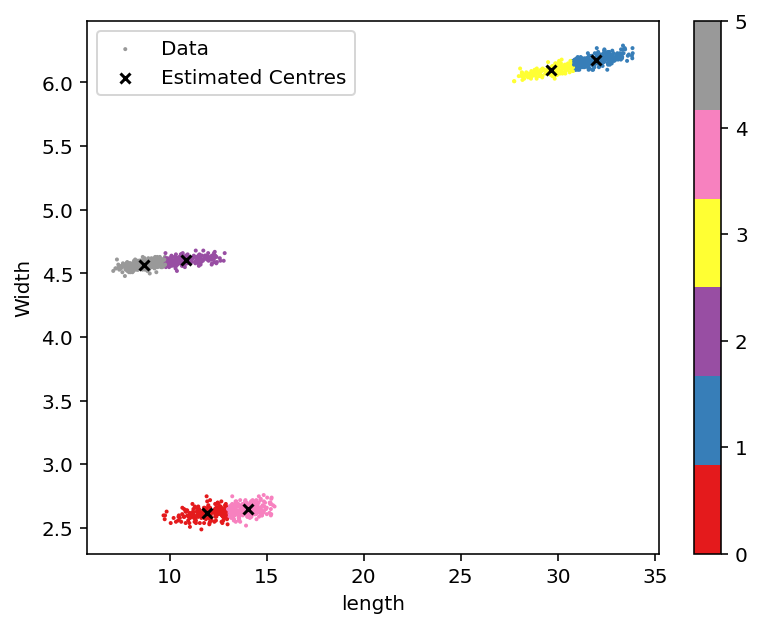

<ipython-input-178-966244c601f6>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xkmeans, ykmeans, c='black', cmap=cmap, marker='x', s=25, label='Estimated Centres')


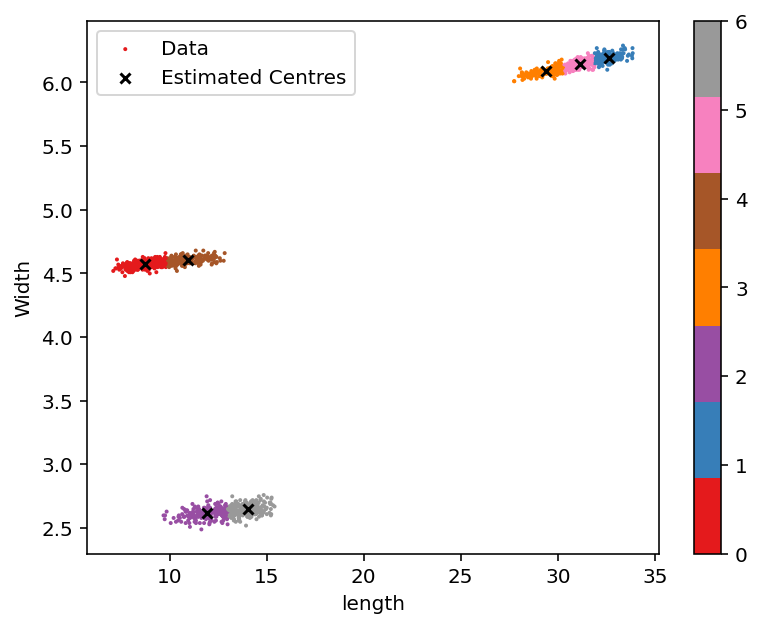

In [179]:
inv_norm = scaler.inverse_transform(norm)  # this is important for plotting data accurately
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm)     # fit done on x,y pairs
    labels = kmeans.labels_

    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    plot_fitted_length_width(labels, inv_norm, xkmeans, ykmeans, cenlabels)

Now to perform the fitting we can tweak the data we have. i.e we can select one of the species and perform fitting.

In [117]:
data_df_Sillaginopsis_panijus = data_df_species.loc[data_df_species['species'] == 'Sillaginopsis panijus']
data_df_Sillaginopsis_panijus

,species,length,weight,w_l_ratio
3625,Sillaginopsis panijus,32.52,6.23,0.19
3626,Sillaginopsis panijus,30.18,6.13,0.20
3627,Sillaginopsis panijus,28.61,6.04,0.21
3628,Sillaginopsis panijus,28.38,6.08,0.21
3629,Sillaginopsis panijus,30.09,6.09,0.20
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [182]:
data_df_Sillaginopsis_panijus_length_width = data_df_Sillaginopsis_panijus[['length', 'weight']]
data_df_Sillaginopsis_panijus_length_width.corr()

,length,weight
length,1.000000,0.847795
weight,0.847795,1.000000


In [185]:
def plot_random_scatter_with_line(x, y, xline, yline):
    """
    Creates a scatter plot of random x and y data with overplotted line
    """
    plt.figure(dpi=144)
    xline = np.linspace(np.min(x), np.max(x), 100)
    yline = np.linspace(np.min(y), np.max(y), 100)
    # scatter plot
    plt.plot(x, y, 'bo')
    plt.plot(xline, yline, 'k-')

    # formatting
    plt.xlabel('Length')
    plt.ylabel('Weight')
    plt.title('Scatter plot with line for Length and Weight of Sillaginopsis Panijus')
    plt.show()
    return

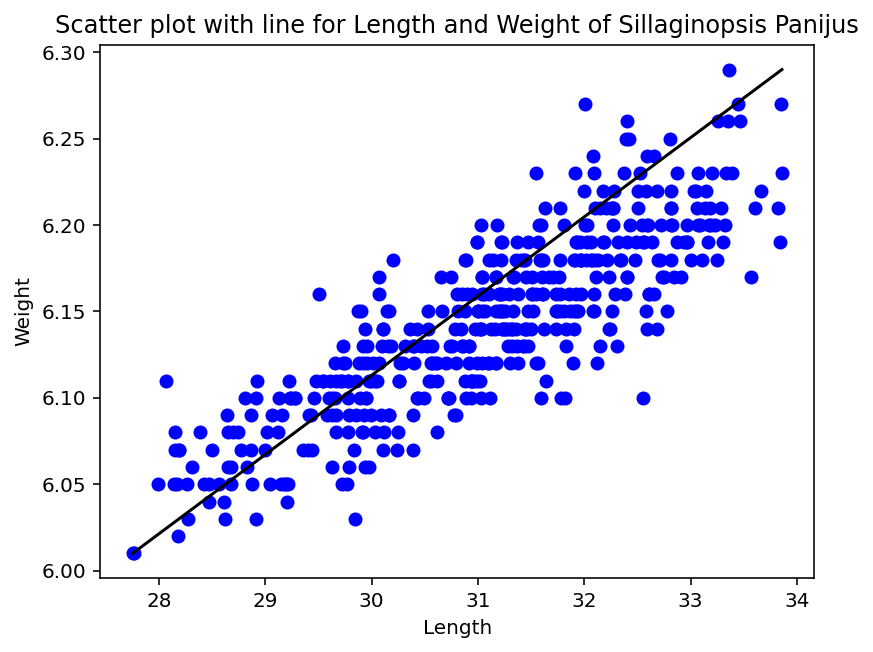

In [186]:
plot_random_scatter_with_line(data_df_Sillaginopsis_panijus['length'], data_df_Sillaginopsis_panijus['weight'], xline, yline)

In [120]:
from scipy.optimize import curve_fit
from numpy.polynomial import Polynomial as Poly

In [121]:
def linfunc(x, a, b):
    """ Function for fitting a straight line, for curve_fit
        x: independent variable
        a, b: parameters to be fitted
    """
    y = a*x + b
    return y

In [122]:
p, cov = curve_fit(linfunc, x, y)  # give it the function to be fitted then x and y

# the errors are the square root of the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(cov))

print(f"a = {p[0]:.2f} +/- {sigma[0]:.2f}")
print(f"b = {p[1]:.2f} +/- {sigma[1]:.2f}")

a = 0.03 +/- 0.00
b = 5.13 +/- 0.03


In [187]:
def plot_random_scatter_with_fitted_line(x, y, xline, yline):
    """
    Creates a scatter plot of random x and y data with fitted line
    """
    plt.figure(dpi=144)

    xline = np.linspace(np.min(x), np.max(x), 100)
    yline = np.linspace(np.min(y), np.max(y), 100)
    # scatter plot
    plt.plot(x, y, 'bo')
    plt.plot(xline, yline, 'k--')

    # make some data for the fitted line, using scipy
    xfit = np.linspace(np.min(x), np.max(x), 100)
    plt.plot(xfit, linfunc(xfit, p[0], p[1]), 'k-')  # note the call to the defined function
    # see error margins as f(x) = ax + b
    plt.fill_between(xfit, linfunc(xfit, p[0] - sigma[0], p[1] - sigma[1]),
                     linfunc(xfit, p[0] + sigma[0], p[1] + sigma[1]), color='k', alpha=0.1)

    plt.plot(*p_np.linspace(), 'k-')

    # formatting
    plt.xlabel('Length')
    plt.ylabel('Weight')
    plt.title('Scatter plot with line for Length and Weight of Sillaginopsis Panijus')
    plt.legend(['Data', 'Fitted line', 'Error margins'])
    plt.show()
    return

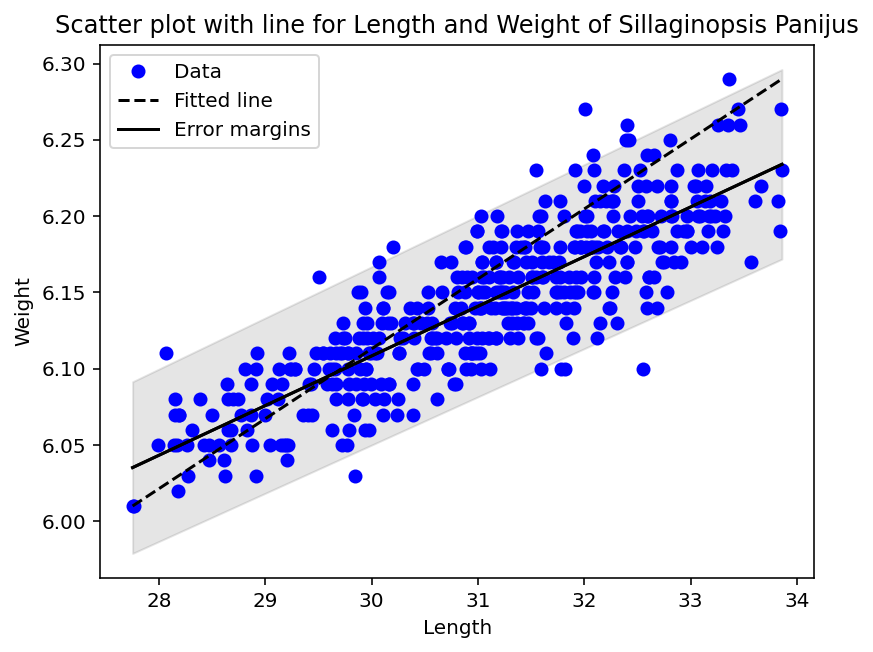

In [188]:
plot_random_scatter_with_fitted_line(data_df_Sillaginopsis_panijus['length'], data_df_Sillaginopsis_panijus['weight'], xline, yline)

In [125]:
# Lets predict weights for lengths ranging from 34 to 35
predicted_lengths = np.arange(34,35,0.1)
predicted_weights = linfunc(predicted_lengths, p[0], p[1])

array([6.23858873, 6.24184285, 6.24509697, 6.24835109, 6.25160521,
       6.25485933, 6.25811345, 6.26136757, 6.26462169, 6.26787582])

In [126]:
uncertainties = np.sqrt((predicted_lengths * sigma[0])**2 + sigma[1]**2)

# Now, Print predicted weights and their uncertainties
for length, weight, uncertainty in zip(predicted_lengths, predicted_weights, uncertainties):
    print(f"Length: {length:.1f}, Predicted Weight: {weight:.4f} +/- {uncertainty:.4f}")

Length: 34.0, Predicted Weight: 6.2386 +/- 0.0441
Length: 34.1, Predicted Weight: 6.2418 +/- 0.0441
Length: 34.2, Predicted Weight: 6.2451 +/- 0.0442
Length: 34.3, Predicted Weight: 6.2484 +/- 0.0443
Length: 34.4, Predicted Weight: 6.2516 +/- 0.0443
Length: 34.5, Predicted Weight: 6.2549 +/- 0.0444
Length: 34.6, Predicted Weight: 6.2581 +/- 0.0445
Length: 34.7, Predicted Weight: 6.2614 +/- 0.0446
Length: 34.8, Predicted Weight: 6.2646 +/- 0.0446
Length: 34.9, Predicted Weight: 6.2679 +/- 0.0447
